In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Image_Size=256
Batch_Size=32
CHANNELS=3


In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(Image_Size,Image_Size),
    batch_size=Batch_Size
)


Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)

(32, 256, 256, 3)


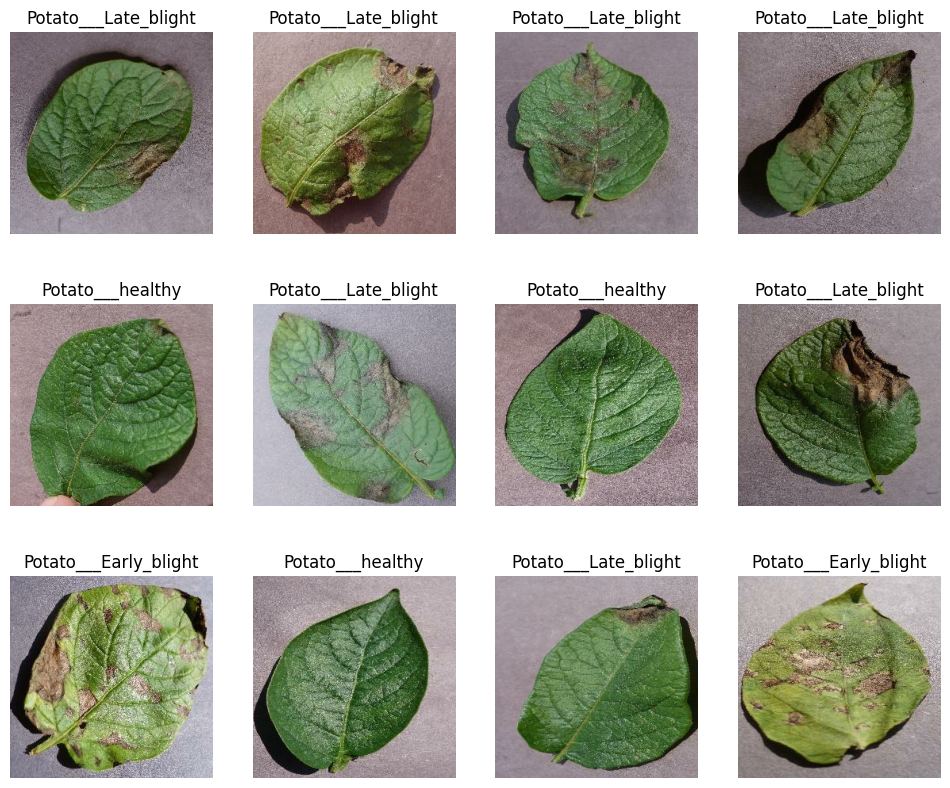

In [6]:
plt.figure(figsize=(12,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [7]:
len(dataset)

68

In [8]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [9]:
test_data=dataset.skip(54)
len(test_data)

14

In [10]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [11]:
val_ds=test_data.take(6)
len(val_ds)

6

In [12]:
test_data=test_data.skip(6)
len(test_data)

8

In [13]:
def get_dataset(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):
    ds_size=len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds,test_ds

In [14]:
train_ds,val_ds,test_ds=get_dataset(dataset)

In [15]:
len(train_ds)

54

In [16]:
len(test_data)

8

In [17]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(Image_Size, Image_Size),  # Use layers.Resizing
    layers.Rescaling(1./255)  # Use layers.Rescaling
])

In [19]:
# Data Augmentation
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [20]:
Image_Size = 256
Batch_Size = 32
CHANNELS = 3
Input_Shape = (Image_Size, Image_Size, CHANNELS)

model = models.Sequential()

# Add resize and rescale, ensuring input shape compatibility
model.add(layers.InputLayer(input_shape=Input_Shape))  # Explicit input shape definition
model.add(resize_and_rescale)  # Assuming it's a preprocessing layer
model.add(data_augmentation)  # Assuming it's another preprocessing layer

# Add convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D())

# Flatten and dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))  # Assuming 3 output classes


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 476,451 (1.82 MB)

 Trainable params: 476,451 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy, metrics=['accuracy'])


In [23]:
history=model.fit(train_ds, epochs=20, batch_size=Batch_Size,validation_data=val_ds)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.4925 - loss: 0.9094 - val_accuracy: 0.7917 - val_loss: 0.5826
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.8260 - loss: 0.4640 - val_accuracy: 0.8229 - val_loss: 0.3819
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.8935 - loss: 0.2696 - val_accuracy: 0.9010 - val_loss: 0.2720
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.9452 - loss: 0.1648 - val_accuracy: 0.9219 - val_loss: 0.2133
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.9430 - loss: 0.1564 - val_accuracy: 0.9479 - val_loss: 0.1554
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.9422 - loss: 0.1522 - val_accuracy: 0.8802 - val_loss: 0.2536
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.9431 - loss: 0.1427 - val_accuracy: 0.9583 - val_loss: 0.1119
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.9563 - loss: 0.1252 - val_accuracy: 0.9896 - v

In [34]:
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 334ms/step - accuracy: 0.9558 - loss: 0.1207


[0.1493874043226242, 0.9453125]

In [35]:
history.params

{'verbose': 'auto', 'epochs': 20, 'steps': 54}

In [36]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [37]:
acc=history.history['accuracy']
vali_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [38]:
Epochs=20

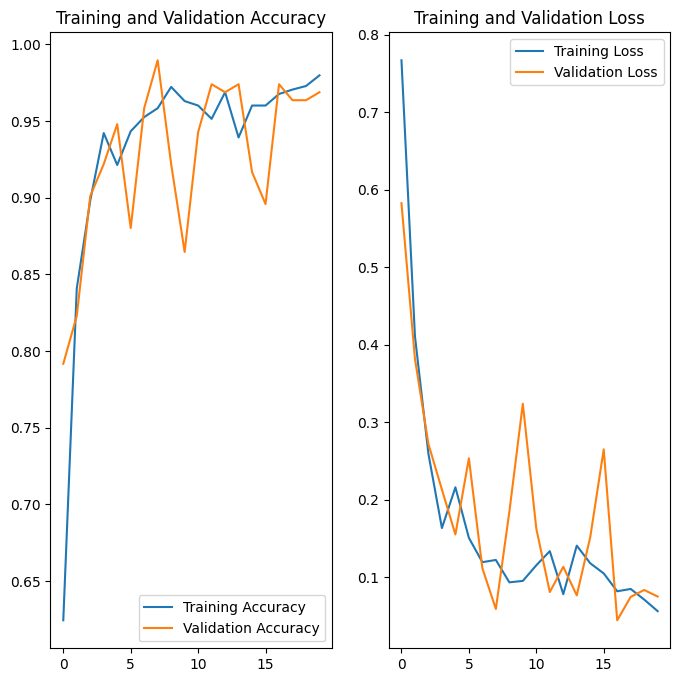

In [39]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(Epochs), acc, label='Training Accuracy')
plt.plot(range(Epochs), vali_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(Epochs), loss, label='Training Loss')
plt.plot(range(Epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First Image predict
Actual Label Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
predicted label: Potato___Early_blight


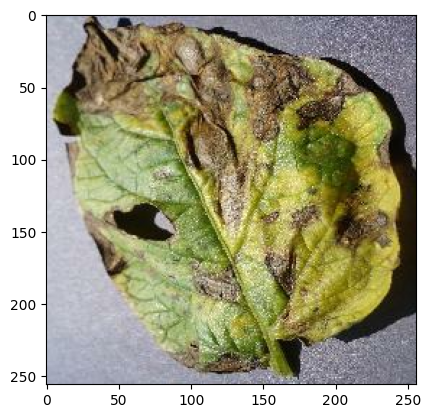

In [40]:
for image_batch,label_batch in test_ds.take(1):
    first_img=image_batch[0].numpy().astype('uint8')
    first_lable=label_batch[0].numpy()

    print('First Image predict')
    plt.imshow(first_img)
    print(f"Actual Label",class_names[first_lable])

    batch_predict=model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_predict[0])])

In [41]:

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


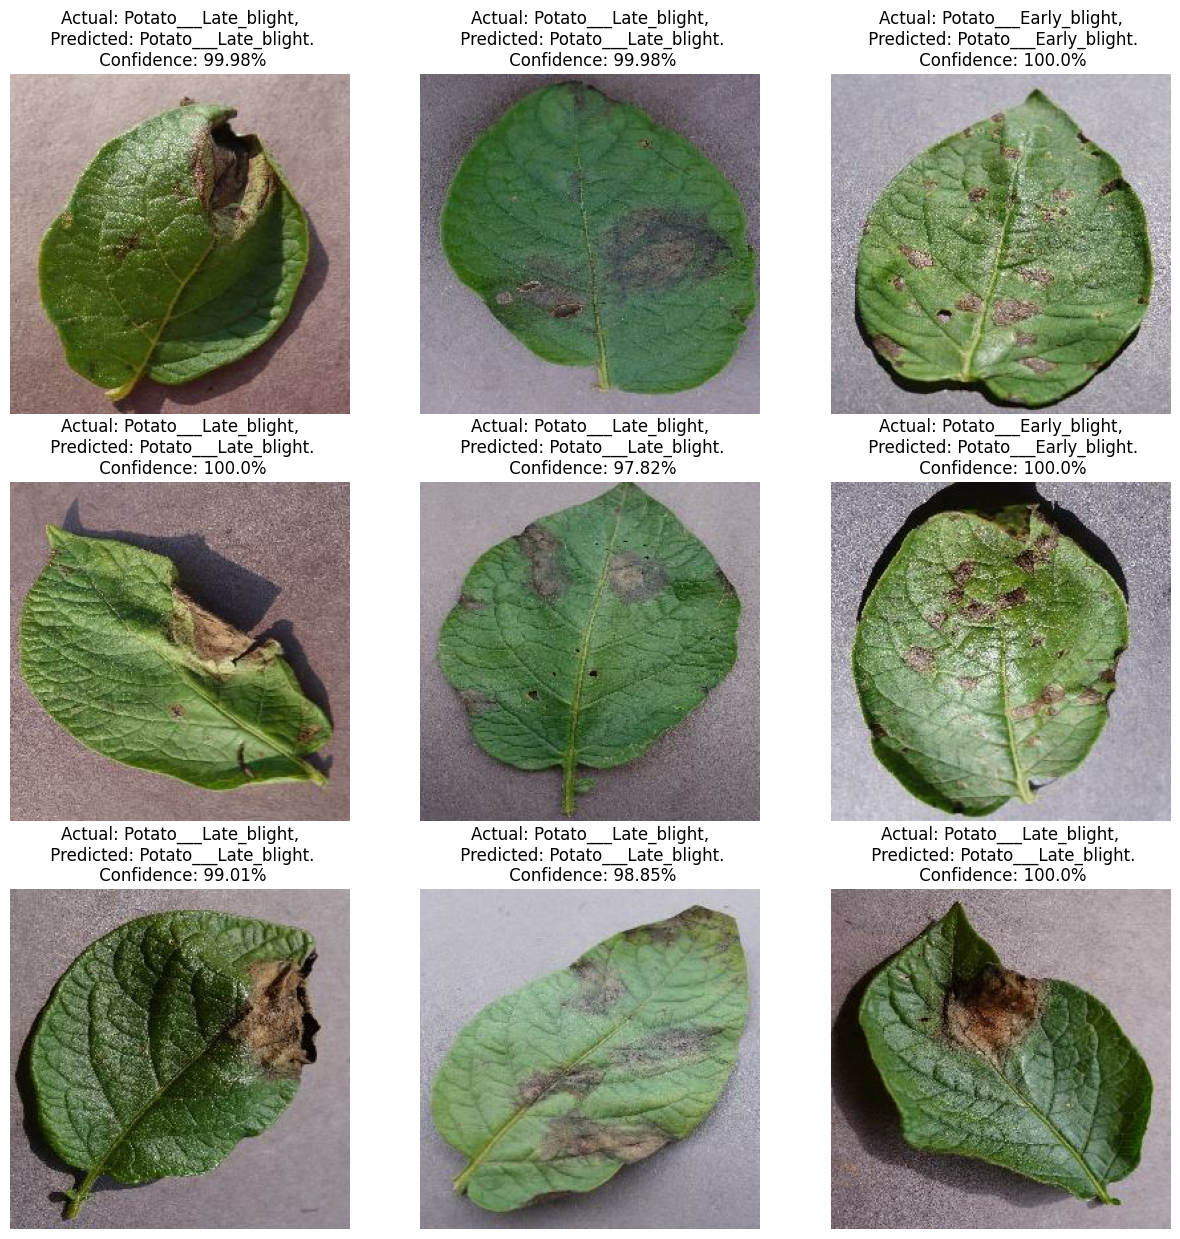

In [42]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [55]:
# model.save("my_model.h5")
print(type(model))

<class 'keras.src.models.sequential.Sequential'>
